# End-to-End Machine Learning Project
## Hands-On ML with Scikit-Learn and Tensorflow

### Notes taken from the textbook

In [2]:
# House-keeping, ignores any warnings

import warnings
warnings.filterwarnings('ignore')

## Look at the big picture

* Frame the problem: Learn what the goal is
* Select a performance measure: Choose a performance measure. RMSE, MAE etc.
* Check any assumptions

## Get the data

In [3]:
import os
import tarfile
from six.moves import urllib

In [4]:
BASE_DIR = os.environ['VIRTUAL_ENV']
DOWNLOADS_DIR = os.path.join(BASE_DIR, 'data', 'handson-ml')

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = os.path.join(DOWNLOAD_ROOT, HOUSING_PATH, 'housing.tgz')

HOUSING_DIR = os.path.join(DOWNLOADS_DIR, HOUSING_PATH)

### Get data

In [5]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_dir=HOUSING_DIR):
    if not os.path.isdir(housing_dir):
        os.makedirs(housing_dir)
    tgz_path = os.path.join(housing_dir, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_dir)
    housing_tgz.close()
    
fetch_housing_data(housing_url=HOUSING_URL, housing_dir=HOUSING_DIR)

### Load data

In [6]:
import pandas as pd

In [7]:
def load_housing_data(housing_dir=HOUSING_DIR):
    csv_path = os.path.join(housing_dir, 'housing.csv')
    return pd.read_csv(csv_path)

### Visualize data structure

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


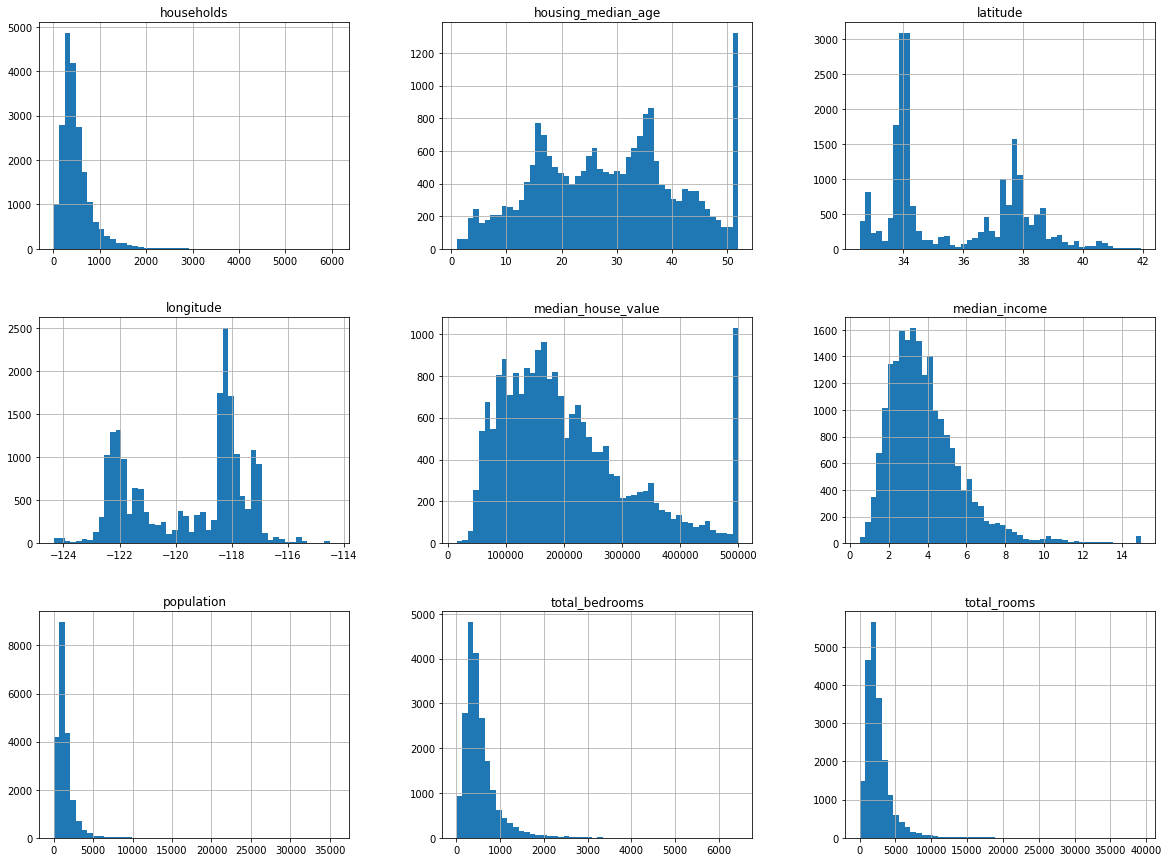

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

def histogram(data):
    data.hist(bins=50, figsize=(20, 15))
    plt.show()
    
histogram(housing)

## Create a test set

* We want the test set to be consistent across program executions. i.e. the test set may change with new data additions
* In order to avoid this, we set a random seed with the train-test split. This ensures that samples are shuffled in the same manner
* Another method is to calculate a hash of unique identifiers in the data and put this instance in the test set if this value is lower than a threshold. Any new data would have to be appended to the end of the dataset for this to work.

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(housing, test_size=0.20, random_state=42)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        3921 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


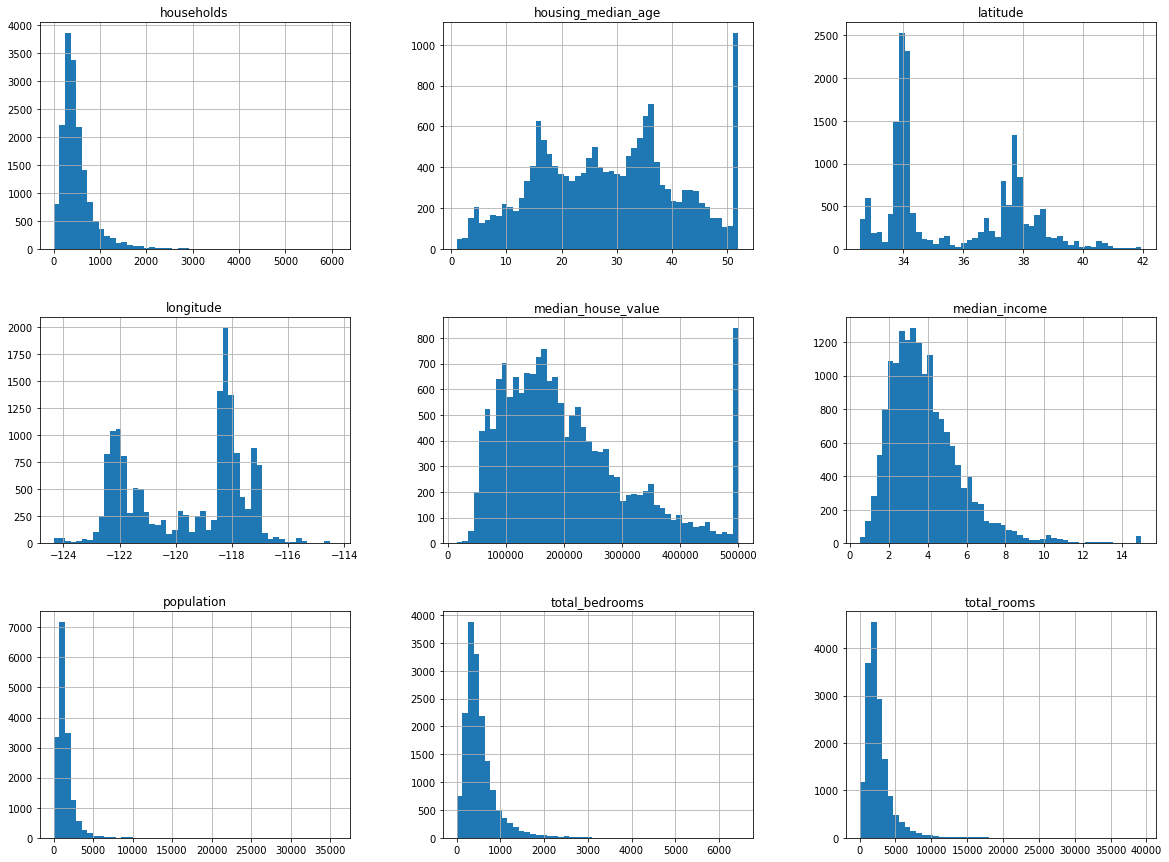

In [16]:
histogram(train)

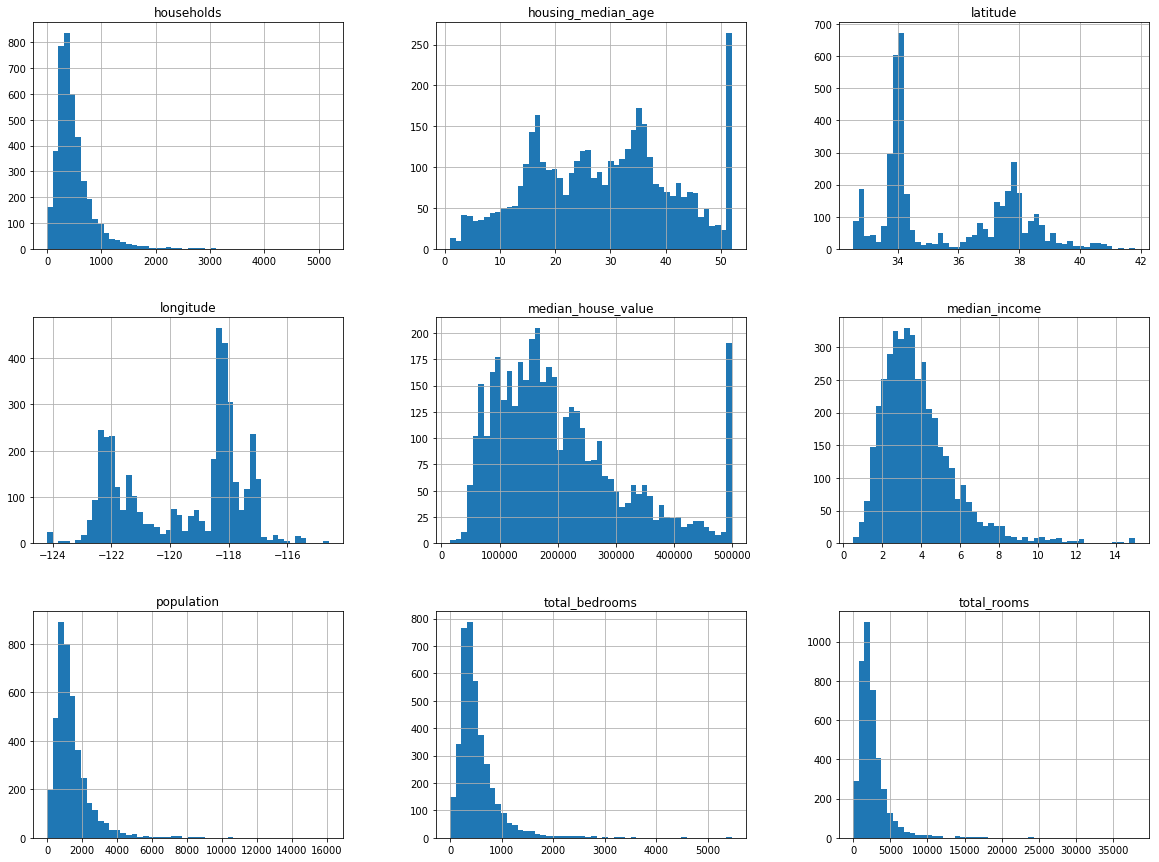

In [17]:
histogram(test)

* The histogram's of the train and test set seem to resemble the original population, which indicates that there was no bias in the sampling process. This is not a problem when it comes to random sampling of large datasets, but, it may introduce biases when dealing with smaller datasets. That is why we need stratified sampling.

### Stratified Sampling

* When the population that you are trying to sample is divided into homogenous subgroups (strata), the sample needs to be representative of this property of the population. This is called stratified sampling.
* Used to avoid introducing sampling bias
* This is usually not a problem in large enough samples.
* For example, the population of the US is 51.3% female and 48.7% male, so a survey will need to maintain this ratio in any sample it produces 
* So, in this case with housing prices, median_income has the following split (as seen in the histogram). The test set that we generate must adhere to this ratio to be an accurate representation of the population that it is sampling.

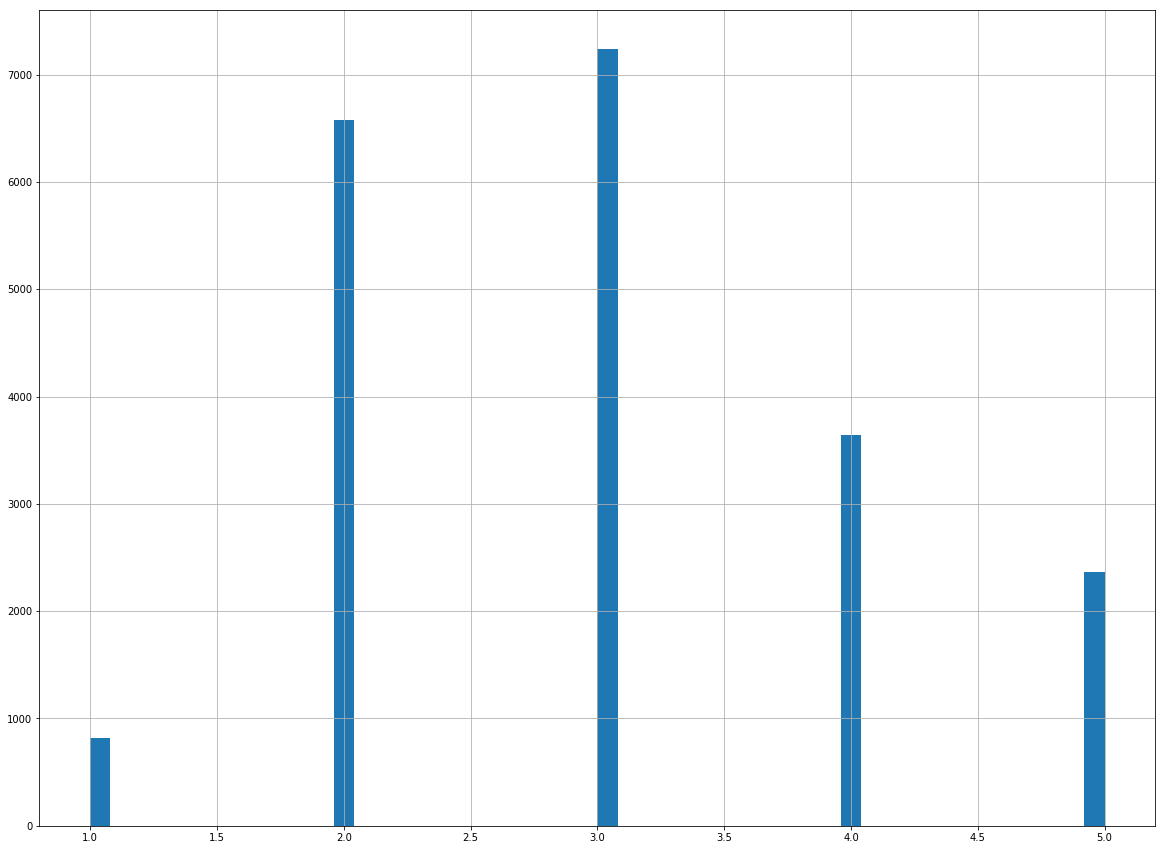

In [18]:
import numpy as np

def create_income_categories(sample):
    sample['income_cat'] = np.ceil(sample['median_income']/1.5)
    sample['income_cat'].where(sample['income_cat'] < 5, 5.0, inplace=True)
    return sample

housing = create_income_categories(housing)
test = create_income_categories(test)
histogram(housing['income_cat'])

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

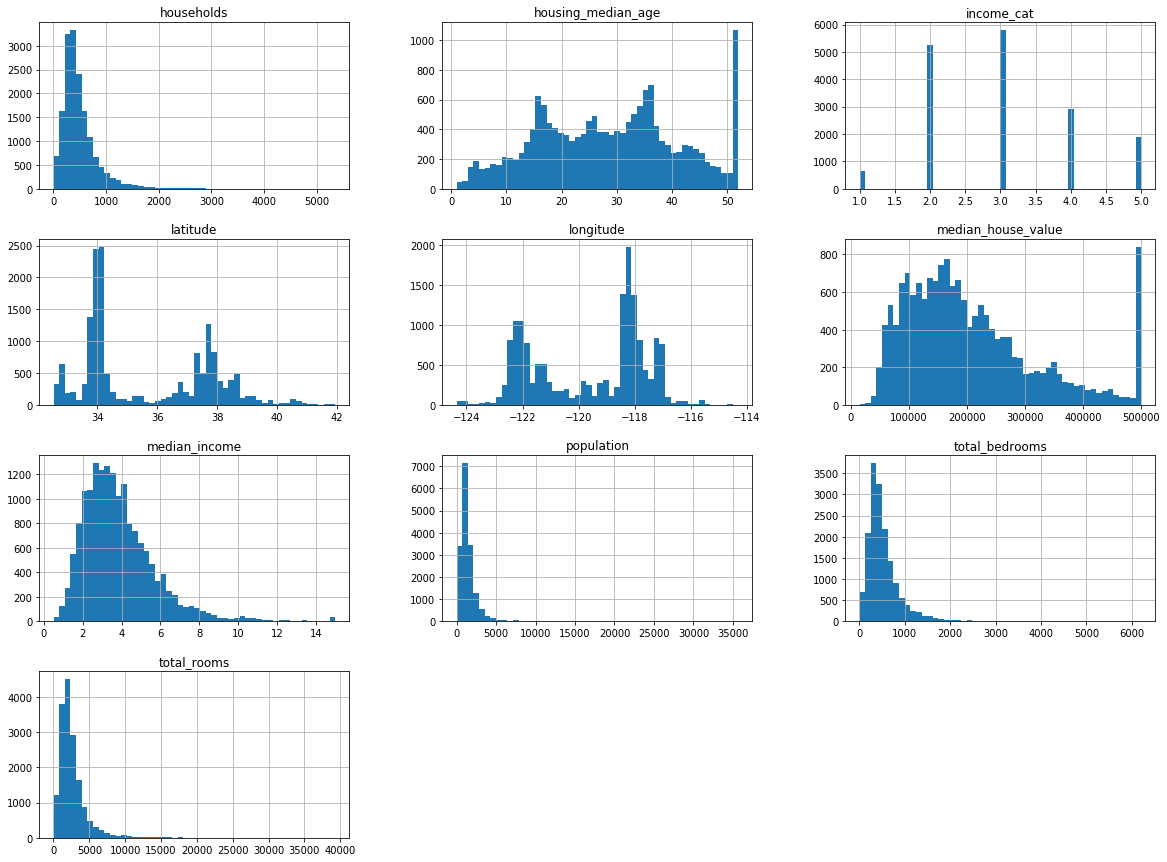

In [20]:
histogram(strat_train_set)

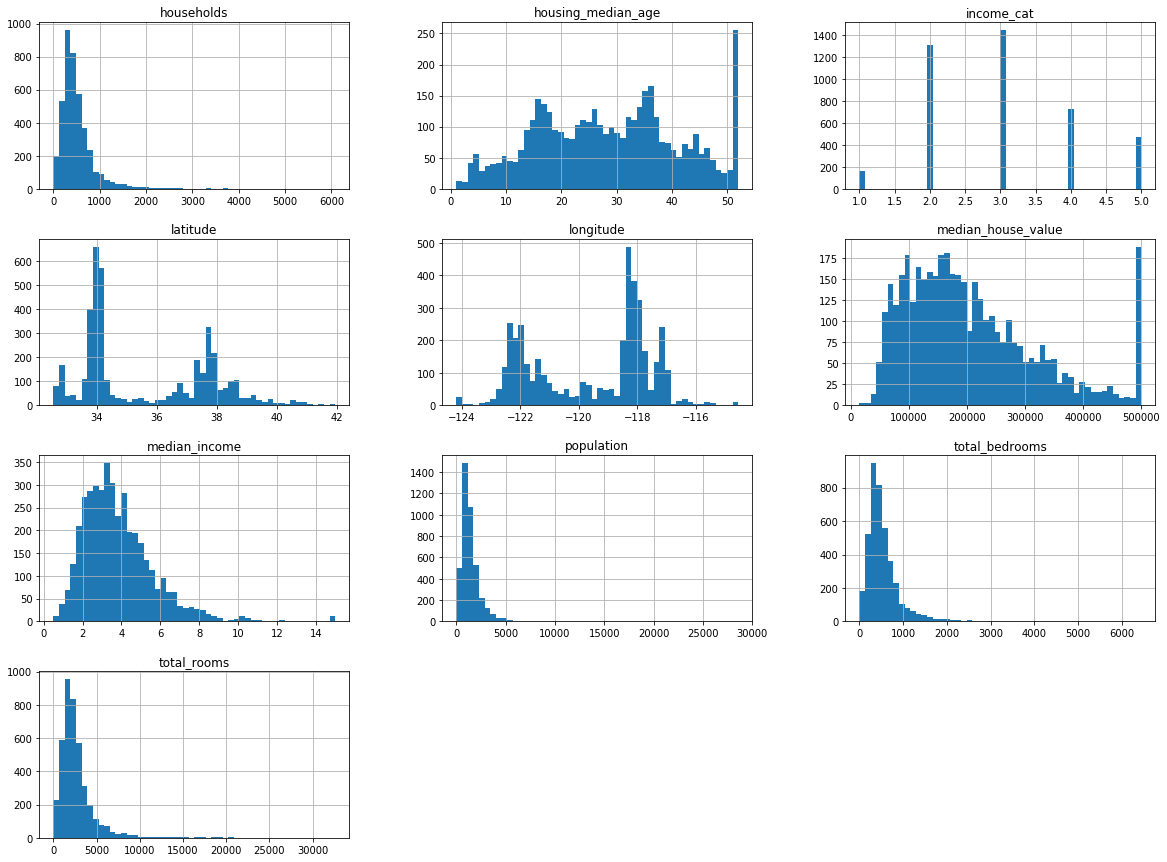

In [21]:
histogram(strat_test_set)

In [22]:
def compare_sampling_bias(sample):
    return sample['income_cat'].value_counts() / len(sample)

results = pd.DataFrame({
    'Population': compare_sampling_bias(housing),
    'Stratified': compare_sampling_bias(strat_test_set),
    'Random': compare_sampling_bias(test)
}).sort_index()

results['Stratified % Error'] = ((results['Population'] - results['Stratified']) / results['Population']) * 100
results['Random % Error'] = ((results['Population'] - results['Random']) / results['Population']) * 100

results

,Population,Stratified,Random,Stratified % Error,Random % Error
1.0,0.039826,0.039729,0.040213,0.243309,-0.973236
2.0,0.318847,0.318798,0.324370,0.015195,-1.732260
3.0,0.350581,0.350533,0.358527,0.013820,-2.266446
4.0,0.176308,0.176357,0.167393,-0.027480,5.056334
5.0,0.114438,0.114583,0.109496,-0.127011,4.318374


* As you can see, stratified sampling gives a much lower error % compared to random sampling.

In [23]:
# Drop income_category from stratified train and test sets 
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [24]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

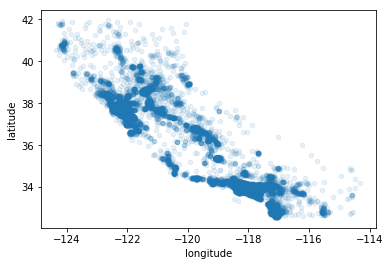

In [25]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

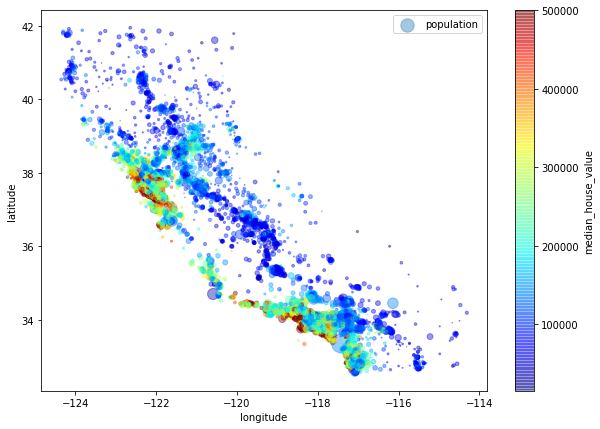

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

### Looking for correlations

* The Pearson correlation coefficient represents how linearly correlated the data is.
* It ranges from -1 to 1, with -1 indicating a strong negative correlation and +1, a strong positive correlation. 0 indicates no linear correlation.
* Intuition:
    * Fit a line: The first step to understanding the Pearson Correlation is to fit a line around the data.
    * Slope of the line: If the slope of the line is positive, it indicates a positive correlation, negative indicates a negative correlation and so on.
    * Quality of the fit: The quality of the fit is determined by the scatter of the points around the Y-axis vs the scatter around the fitted line. If the former is larger than the latter, this indicates a higher correlation and vice versa.

In [27]:
from IPython.display import HTML

HTML(
'''<iframe width="320" height="240" frameborder="0"
    src="https://www.youtube.com/embed/ugd4k3dC_8Y" 
    allowfullscreen>
    </iframe>''')

In [28]:
corr_matrix = housing.corr()
corr_matrix.sort_values(by='median_house_value', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89b39a95f8>,
      dtype=object)

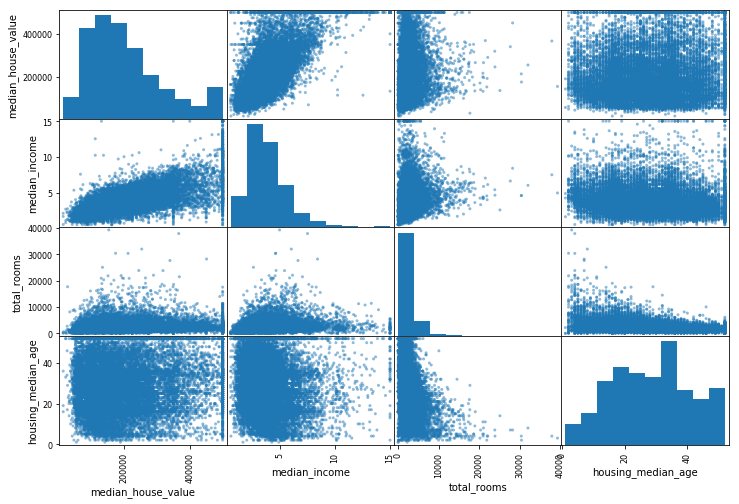

In [29]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']], figsize=(12,8))

### Experimenting with attribute combinations

In [30]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

* Increasing the number of parameters with stronger correlation, increases the accuracy of machine learning models

## Prepare data for machine learning algorithms

In [31]:
# separate predictors and labels
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning

There will be missing features in the data. So, you can either:

* Drop the NaNs from the corresponding feature
* Get rid of the whole attribute
* Set the values to some value (zero, mean, median etc.)

```
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows
```

To find NULLs in the dataset

```
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
```

In [33]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')

In [34]:
# Dropping 'ocean_proximity' because it is a non-numerical attribute
housing_num = housing.drop('ocean_proximity', axis=1)

In [35]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [38]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

Note: Imputer computes the median for each attribute and replaces any NaN values with it. Here, you can see a comparison of median values calculated using imputer and from the original pd dataframe.

In [50]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [41]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

### Handling text and Categorical Attributes

In [42]:
# Make a copy of housing categories
housing_cat = housing['ocean_proximity'].copy()
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [48]:
from sklearn.preprocessing import OneHotEncoder

housing_cat_encoded, housing_categories = housing_cat.factorize()
print('Encoded: {}, List of Categories: {}'.format(housing_cat_encoded[:10], housing_categories))
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

Encoded: [0 0 1 2 0 2 0 2 0 0], List of Categories: Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')


ML algorithms will assume that two nearby values are more similar than two distant values. This is not true in this case. This is why One-Hot Encoding is used.

### Custom Transformers



In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [53]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)